### Задание 2
**Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv - Google Диск:
Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите
менеджеру?**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
df = pd.read_csv("ab_stats.csv")
df

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814
...,...,...,...,...,...
23647,0.0,0,0,B,10.207152
23648,0.0,0,0,B,5.148761
23649,0.0,0,0,B,4.809019
23650,0.0,0,0,B,8.127488


 __*Проверка на наличие пустых ячеек и корректность типов данных:*__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


__*Так как расситывается Average Revenue per PAYING User, оставляем в таблице только пользователей, совершивших покупку:*__

In [4]:
df = df[(df["purchase"]==1) & (df["num_purchases"]>0) & (df["revenue"]>0.0)]
df.shape[0]

490

__*Разделяем на группы по вариантам А и В:*__

In [5]:
control = df[df["ab_group"]=="A"][["revenue"]]

In [6]:
variant = df[df["ab_group"]=="B"][["revenue"]]

__*Визуализируем данные при помощи "ящика с усами":*__

<AxesSubplot: >

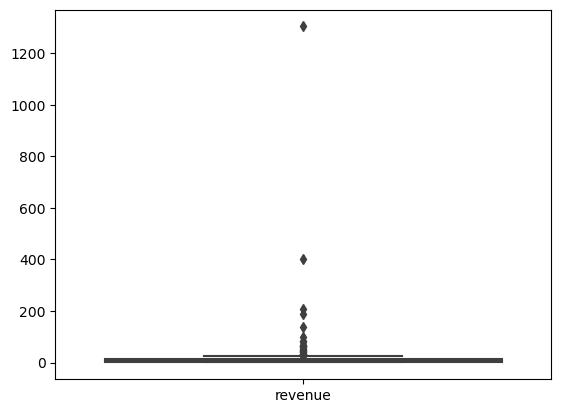

In [7]:
sns.boxplot(control)

<AxesSubplot: >

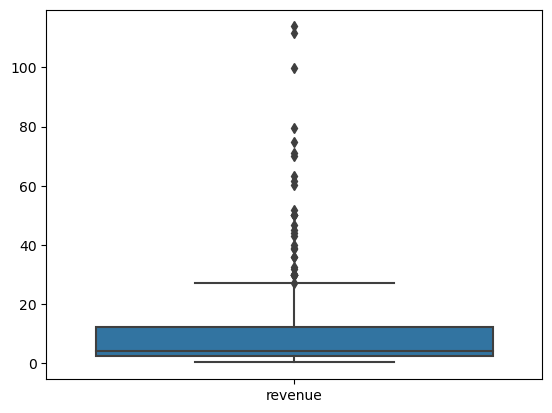

In [8]:
sns.boxplot(variant)

__*Удалим выбросы*__:

In [9]:
control = control[control["revenue"]<300]

__*Посчитаем ARPPU в каждой группе*__

In [10]:
ARPPU_control = control["revenue"].mean()
ARPPU_variant = variant["revenue"].mean()
ARPPU_control, ARPPU_variant

(12.132120818897635, 12.36211875641025)

__*Проверим данные на нормальность*__:

In [11]:
stats.shapiro(control)

ShapiroResult(statistic=0.4545261859893799, pvalue=3.669928072135898e-27)

In [12]:
stats.shapiro(variant)

ShapiroResult(statistic=0.6179500818252563, pvalue=1.599590675565433e-22)

Условия нормальности НЕ соблюдаются. 

__*Для проверки наличия статистически значимых отличий используем тест Мана-Уитни:*__

In [13]:
stats.mannwhitneyu(control["revenue"],variant["revenue"])

MannwhitneyuResult(statistic=29261.5, pvalue=0.7694313594554261)

## _По результатам теста  можно можно судить о том, что в группах отсутствуют статистически значимые отличия, рекомендуется оставить действующий варинат А._